# Homework: Statistical Prediction / Hindcast

Stine Fohrmann

![](plots/homework-stat-predict.png)

# Code

In [1]:
# Imports
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import pandas as pd
from datetime import datetime
import scipy.stats as stats
from random import gauss, seed
from functions import *

In [2]:
data = read_from_file()

lat_min    = 58
lat_max    = 63    # north‑south limits
lon_min    = 9
lon_max    = 13    # west‑east limits

# Select data for area around Oslo (in °C)
data_subset = get_data_subset(data) - 273.15

# Compute reference climatology for 1940-1969
climatology = compute_climatology(data)

## Persistence prediction

Predictand (index to be predicted): # of HWD in JJA

- Idea 1: Next JJA will be the same as previous MAM

    - Predictor (index used for prediction): # of HWD in MAM

    - Lead time: 3 months

- Idea 2: Next JJA will be the same as previous May

    - Predictor (index used for prediction): # of HWD in May

    - Lead time: 1 month

In [3]:
# Count HWD in JJA for each year
hwd_JJA_years, hwd_JJA = count_hwd(data_subset, climatology,
    start_month=6,
    end_month=8
)

# Count HWD in MAM for each year
hwd_MAM_years, hwd_MAM = count_hwd(data_subset, climatology,
    start_month=3,
    end_month=5
)

# Count HWD in May for each year
# hwd_May_years, hwd_May = count_hwd(data_subset, climatology,
#     start_month=5,
#     end_month=5
# )

# Count autumn (SON) HWD for each year
hwd_SON_years, hwd_SON = count_hwd(data_subset, climatology,
    start_month=9,
    end_month=11
)

# Count winter (DJF) HWD for each year
# hwd_MAM_years, hwd_MAM = count_hwd(data_subset, climatology,
#     start_month=12,
#     end_month=2
# )


## Climatology prediction

- count HWD in JJA for reference time frame (1940-1969)

- calculate average number of HWD in JJA

Additional idea: average of previous 5 years

- count HWD in JJA for every year

- calculate average number of HWD for 5 years

In [4]:
hwd_climatology_JJA_years, hwd_climatology_JJA = count_hwd(data_subset, climatology,
    start_year=1940,
    end_year=1969,
    start_month=6,
    end_month=8
)

In [5]:
hwd_climatology_JJA_years_full, hwd_climatology_JJA_full = count_hwd(data_subset, climatology,
    start_year=1940,
    end_year=2024,
    start_month=6,
    end_month=8
)

In [10]:
years = hwd_JJA_years
hwd_avg = hwd_climatology_JJA.mean()
hwd_avg_array = np.full(len(years), hwd_avg)

# Number of years to use for prediction calculation
num_years = 5
# Calculate prediction based on previous years
previous_years_prediction = compute_previous_years_prediction(hwd_climatology_JJA_full, num_years)

len(previous_years_prediction)

85

## Plot

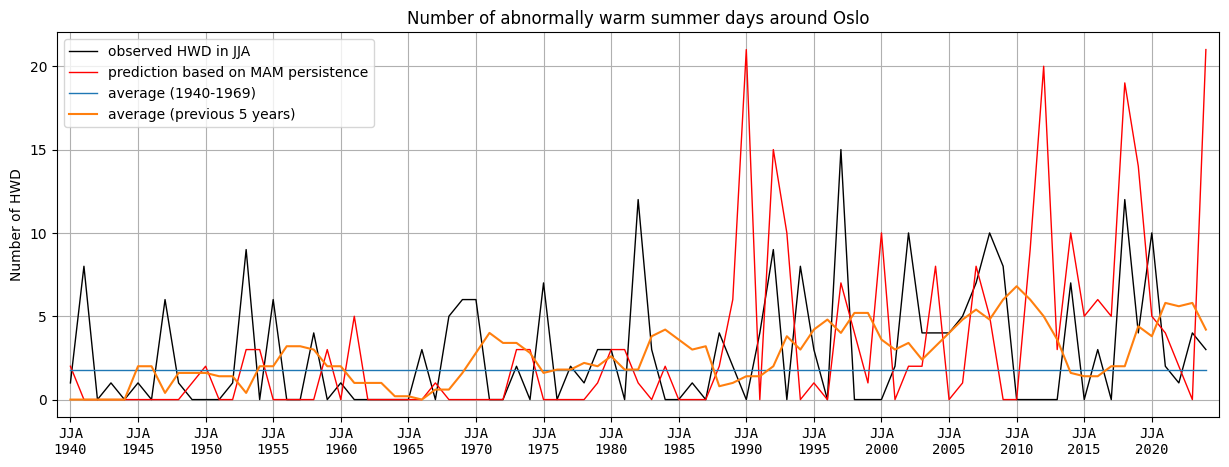

In [9]:
# Plot time series of JJA HWD
plt.figure(figsize=(15,5))

# Plot observed summer HWD
plt.plot(years, hwd_JJA, '-', c='k', lw=1, label='observed HWD in JJA')
# plt.plot(hwd_climatology_JJA_years, hwd_climatology_JJA)

# Prediction based on spring (MAM) persistence
plt.plot(years, hwd_MAM, '-', c='red', lw=1, label='prediction based on MAM persistence')

# Plot prediction based on May persistence
# plt.plot(years, hwd_May, '-', lw=1, label='predicted HWD in JJA')

# Plot prediction based on average number of summer HWD
plt.plot(years, hwd_avg_array, '-', lw=1, label='average (1940-1969)')

# Plot prediction based on average number of summer HWDs of previous 5 years
plt.plot(years, previous_years_prediction, '-', label=f'average (previous {num_years} years)')


# Fig settings
plt.title('Number of abnormally warm summer days around Oslo')
plt.ylabel(r'Number of HWD')
# plt.xlabel(r'time')
plt.grid()
plt.legend()
arial_font = {'fontname': 'monospace'}
plt.xticks(years[::5], labels=[f'JJA\n{y}' for y in years[::5]], **arial_font)
plt.xlim(xmin=1939, xmax=2025)

plt.savefig('plots/homework-stat-predict.png')
plt.show()


# Plot season comparison

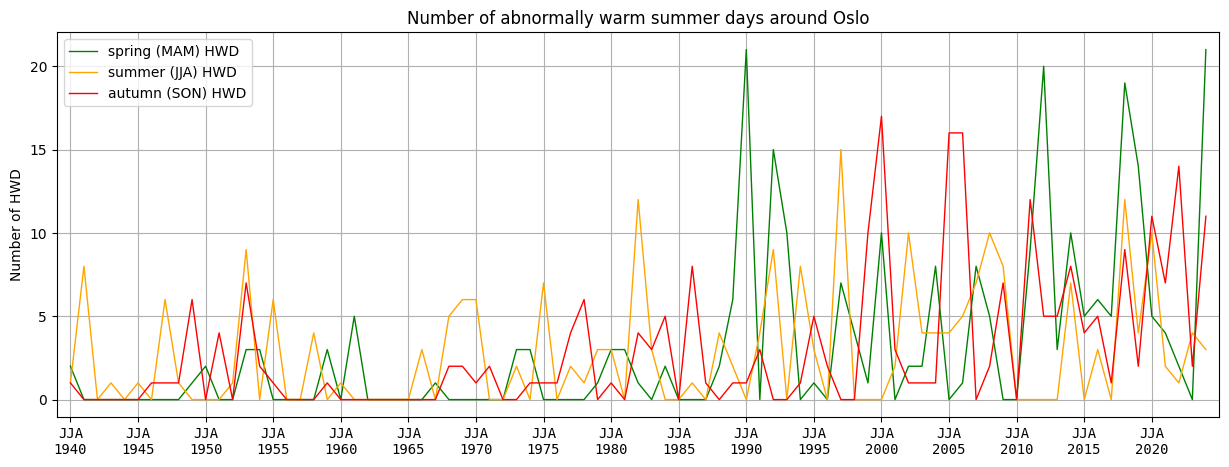

In [ ]:
# Plot time series of JJA HWD
plt.figure(figsize=(15,5))

# Observed spring HWD
plt.plot(years, hwd_MAM, '-', c='green', lw=1, label='spring (MAM) HWD')

# Observed summer HWD
plt.plot(years, hwd_JJA, '-', c='orange', lw=1, label='summer (JJA) HWD')

# Observed autumn HWD
plt.plot(years, hwd_SON, '-', c='red', lw=1, label='autumn (SON) HWD')


# Fig settings
plt.title('Number of abnormally warm summer days around Oslo')
plt.ylabel(r'Number of HWD')
# plt.xlabel(r'time')
plt.grid()
plt.legend()
arial_font = {'fontname': 'monospace'}
plt.xticks(years[::5], labels=[f'JJA\n{y}' for y in years[::5]], **arial_font)
plt.xlim(xmin=1939, xmax=2025)

plt.savefig('plots/season-comparison.png')
plt.show()
